<a href="https://colab.research.google.com/github/arjuna2112/TMDL2025/blob/main/TMDL_2024_25_Assignment_1%2C_Qs_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turing Machine and Deep Learning

## Assignment 1: Preliminaries

This notebook is meant for you to review some mathematics to help your intuition when dealing with more complex models, and some hands on practice with `numpy` and `matplotlib` to review some programming skills. It also introduces you to some common ML lingo. This notebook must be in your GitHub directory by the deadline mentioned on Canvas.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a GitHub repository (this will be where you submit *all* homework assignments). Share the public link to this repository with us via
2. Create a folder called "Week 1" and copy this notebook and any other files or data that may be needed.
3. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Grading is based on effort and you can either obtain a pass or fail for the assignment.

## Question 1.1 -- Regression as minimization

Derive the closed form solution for ***a*** in a 1-dimensional linear regression as states as an optimization (minimization) problem. You may upload a handwritten scan/photograph, a screenshot of a text editor, or LaTeX notation directly.

- *Given*: $n$ input-output pairs of the form $$(x_i, y_i)$$
- *To find*: The coefficients of the line of best fit $$\hat{y_i} = a+bx_i$$
- *Loss function*: The sum of squared errors: $$f(Y, \hat{Y})=\sum_{i=0}^{n}(y_i-\hat{y}_i)^2$$
- ***b*** is found by taking partial derivates with respect to ***b*** and setting it to zero. This gives $$ b = \frac{\sum_{i=0}^{n}(x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=0}^{n}(x_i - \bar{x})^2} $$
Note that in general, loss functions are the distance function *averaged over all data points in the set*. For now, you can ignore this point.

*Hint: Treat this as a regular minimization problem. Find where the partial derivates are zero of the error are with respect to the variables you wish to find.*

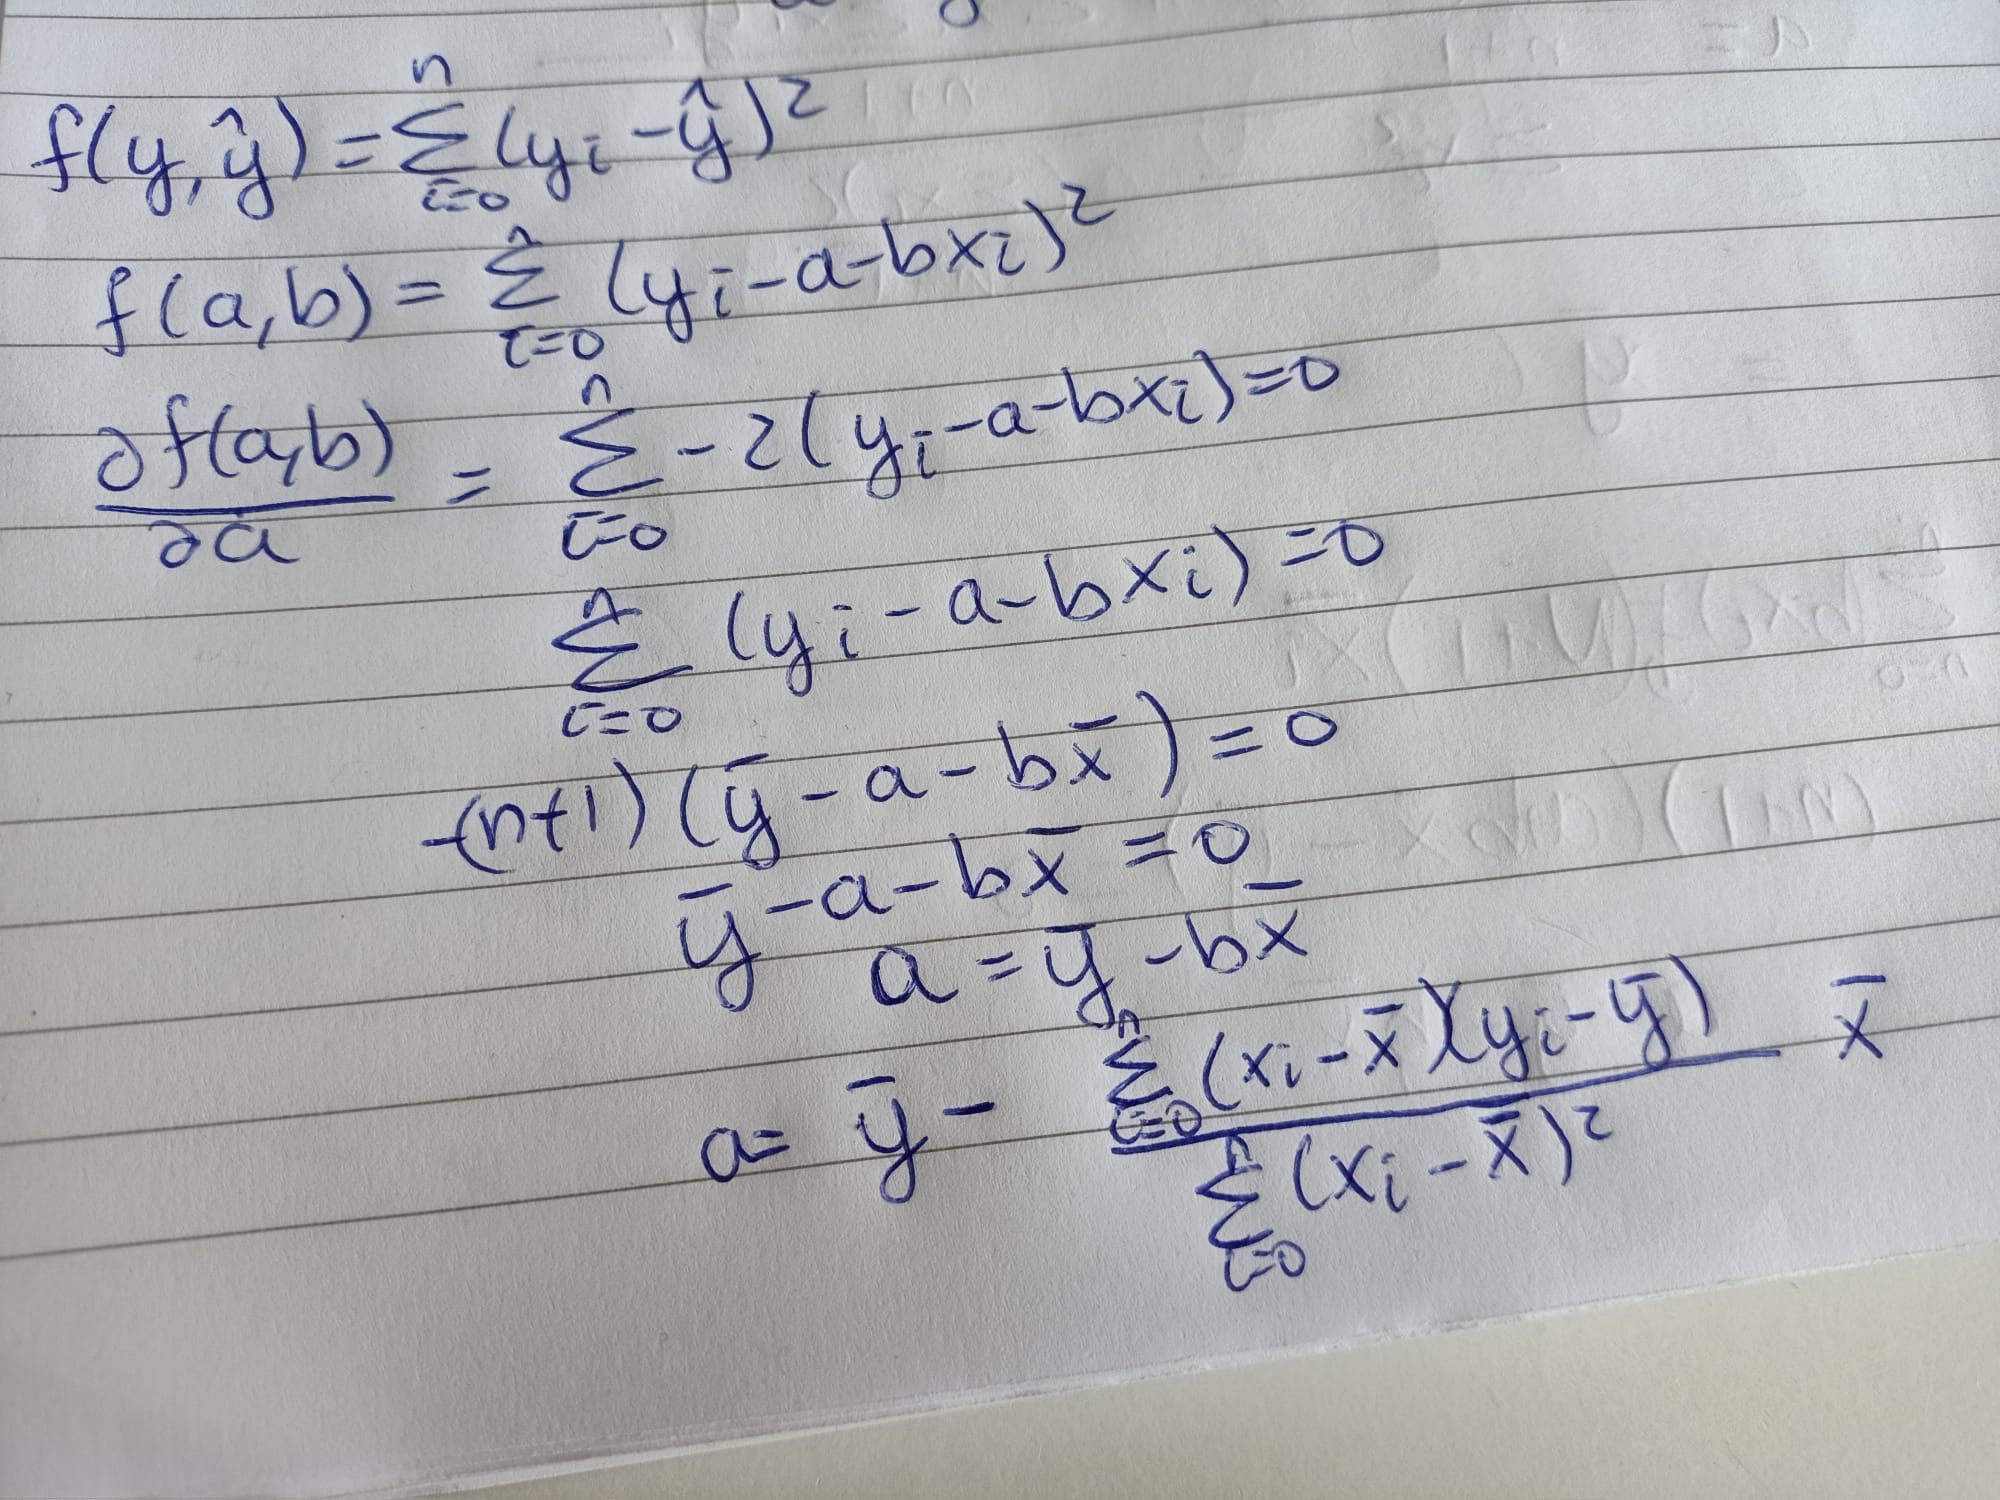

## Question 1.2 -- Function analysis

Is there only one unique solution for $a$ and $b$? Why/why not?

*Hint: Think of the shape of the loss function, a.k.a. the 'loss landscape'.*

Yes, for a given set of input-output pairs, the formula found to calculate a and b yields only one solution. This is because the sum of squared errors is determined by squaring the differences between the predicted value and the actual value. Such a squared formula has its minimum at only 1 point. If one term of the sum is lower, another one will probably be disproportionally higher. An exception is when the data is symmetric. If the input-output pairs change, a and b also logically change.

Would the solutions for $a$ and $b$ be different if you used mean squared error instead of sum of squared errors? Why?

No because the sum of squared errors is equal to the mean squared error * (n+1). As n+1 is a constant factor, the mean squared error is minimal for the same a and b as the sum of squared errors.

## Question 2.1 -- Function generation

Write a function that takes as input a list of floats $x_i$ to and outputs a list of the form:
$$y_i=sin(x_i)+\eta_i$$
where $\eta_i$ is normally sampled noise with a small standard deviation $\epsilon$:
$$\eta_i \sim \mathcal{N}(0, \epsilon)$$

Now, to see your work, plot it!
- Sample 20 equally-spaced points from the range $x\in [0,\pi/4]$ (cf. numpy's `linspace` function).
- Set $\epsilon=0.1$
- Sample y-values from your function using the noisy formula above.
- Plot this as a scatter plot.
- For reference, plot the function $y_i=sin(x_i)$ (no noise).
- Don't forget to add labels, a legend and other information.
- Optional Tip: Set a random seed (np.random.seed) to ensure reproducability of your results.

---


Your results should look something like this:

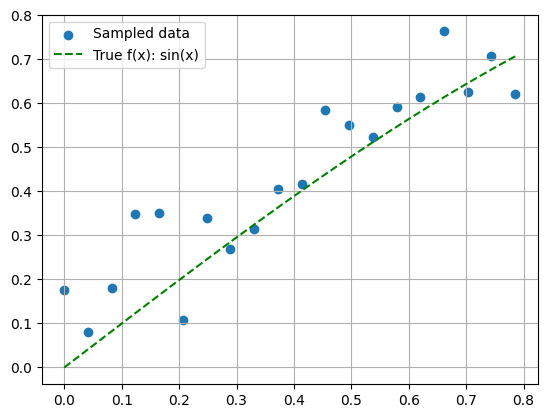

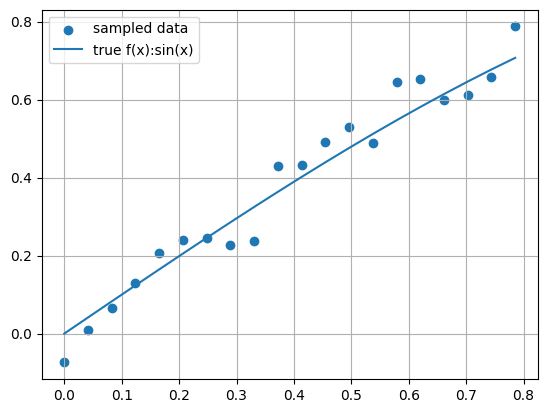

In [188]:
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(0)
n_samples = 20

def generate_sin(x, epsilon):
    # TODO: your code here
    return np.sin(x) + np.random.normal(loc=0.0, scale = epsilon, size = n_samples)

# TODO: create noisy function
x = np.linspace(0, 0.25*np.pi, num=n_samples)
y = generate_sin(x, 0.1)

# TODO: create true function
x_pure = np.linspace(0, 0.25*np.pi, num=n_samples)
y_pure = np.sin(x_pure)

# TODO: plot data, line
plt.scatter(x, y, label="sampled data")
plt.plot(x_pure, y_pure, label="true f(x):sin(x)")
plt.grid()
plt.legend()
plt.show()

## Question 2.2 -- Implementation of Linear Regression

Write a function that takes as input a list of $(x,y)$ pairs and returns the coefficients and residuals for a linear regression. Specifically, use the formula for $a$ and $b$ you found in Question 1.1.

*Hint: It may be better to create a new function that computes the sum of squared errors separately, taking $a$, $b$, and the $(x,y)$ pairs as inputs, and outputting a single float value.*

Compute and plot the line of best fit, along with the data and true function as you did above. Also print out the coefficients and the residuals (sum of square errors). How does this line compare to the true function?

---

You should get something similar to this:

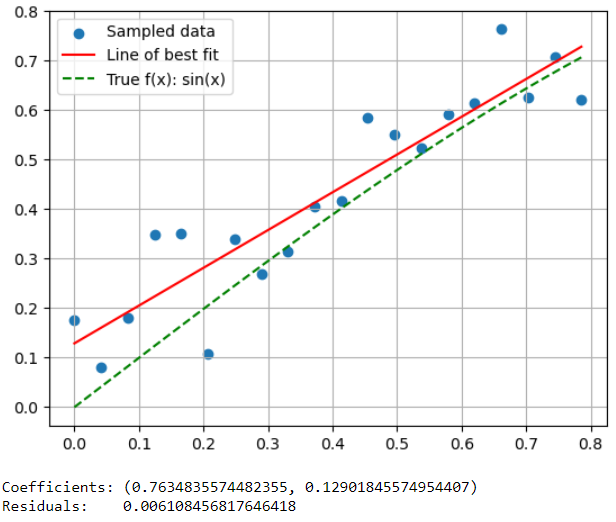

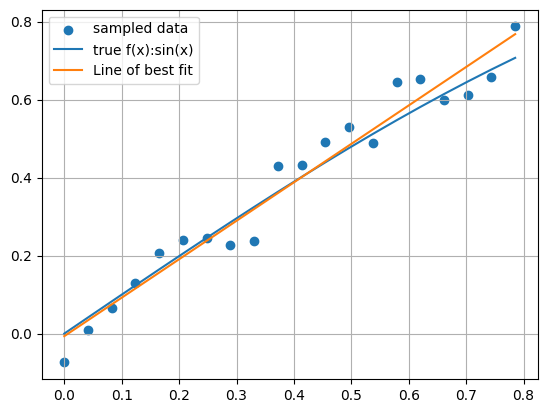

Coefficients: (-0.0065658492997844875, 0.9861079632122304)
Residuals:    0.05252869398111589


In [189]:

def compute_sos(y_true, y_pred):
    # TODO: your code here
    sos = (y_true-y_pred)**2
    sos = np.sum(sos)
    return sos

def lin_reg(xs, ys):
    # TODO: your code here
    b = np.sum((xs-np.mean(xs))*(ys-np.mean(ys))) / np.sum((xs-np.mean(xs))**2)
    a = np.mean(ys) - b*np.mean(xs)
    res = compute_sos(ys, a+b*xs)
    return a, b, res

# TODO: generate line of best fit
a, b, res = lin_reg(x, y)
y_best = b*x+a


# TODO: plot line of best fit, data, etc
plt.scatter(x, y, label="sampled data")
plt.plot(x_pure, y_pure, label="true f(x):sin(x)")
plt.plot(x, y_best, label="Line of best fit")

# make it pretty
plt.grid()
plt.legend()
plt.show()

print("Coefficients:", (a, b))
print("Residuals:   ", res)

## Question 2.3 -- Comparison to existing model

Use numpy's `polyfit` functions to get the coefficients and residuals of the same data points. Plot a line using these coefficients, and plot the sampled data, your previous line of best fit, and the true function, as before, for reference. How does this compare to the function you derived for $a$ and $b$? Print out the values for $a$, $b$ and the residuals to compare them. What does this tell you about the way `polyfit` is implemented?

*Tip: Use a dashed/dotted line for the new function to make the comparison easier.*

*General tip: Don't overwrite your previous variables!*

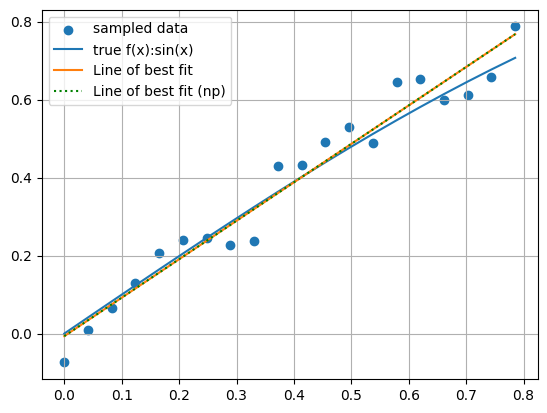

Coefficients:      (-0.0065658492997844875, 0.9861079632122304)
Residuals:         0.05252869398111589
Coefficients (np): (-0.006565849299784463, 0.9861079632122305)
Residuals (np):    0.05252869398111588


In [190]:
# TODO: use np polyfit here
b_np, a_np = np.polyfit(x, y, 1)
y_best_np = a_np + b_np*x
res_np = compute_sos(y, y_best_np)

# TODO: plot everything you need to

plt.scatter(x, y, label="sampled data")
plt.plot(x_pure, y_pure, label="true f(x):sin(x)")
plt.plot(x, y_best, label="Line of best fit")
plt.plot(x, y_best_np, 'g:', label="Line of best fit (np)")

plt.grid()
plt.legend()
plt.show()

# print results
print("Coefficients:     ", (a, b))
print("Residuals:        ", res)
print("Coefficients (np):", (a_np, b_np))
print("Residuals (np):   ", res_np)

The a and b the polyfit function finds are exactly the same. The polyfit function is thus implemented in the same way as we derived the a and b before.

## Question 3 -- Test vs train loss

The mean of the residuals you computed above are often called the *training loss* or *training error* in machine learning lingo. In general, this phrase translates to the loss (difference between observed and predicted $y$ values in whatever metric you wish) over all data points available for you to train on (your *train/train set*). In our case, the 'metric' is the function you minimized, i.e. sum of squared errors.

In real life, you generally do not generate these data points -- you observe them from your experiments. However, you would want for your model to perform well on points that were *not* used to train your model as well -- this is called *generalization*. Thus, to test this, we use a *test set* -- a series of new observations. This will become important in following weeks when we use more complex models.

In general, we would want our test and train sets to have the same distributional properties, including the underlying function and the distribution of noise. Thus, for now, we *generate* a test set and see how our models 'perform' on it (again, we generally do not have access to the underlying function to generate datapoints with, we observe them through experiments). We compute the *test loss* or *test error* using the same metric as the training error (i.e. sum of square errors in this case).

Thus, for this exercise:
- Generate a new set of x-values in the range of $x\in[0,\pi/4]$. Compute a series of y-values using your `generate_sin` function, using the same $\epsilon$ and $n$ as before.
- Rewrite the function that computes the residuals to now compute the *mean* of the residuals. Thus, our loss function is the Mean Squared Error:
$$MSE = \frac{1}{N} \sum_{i=0}^{n}(y_i-\hat{y_i})^2$$
- Make a scatter plot of the train set and test set, and plot the two lines of best fit and the true function computed earlier on the train set. Don't forget labels. Does this seem to be of a similar distribution of the train set?
- Compute and print out the training and test losses.

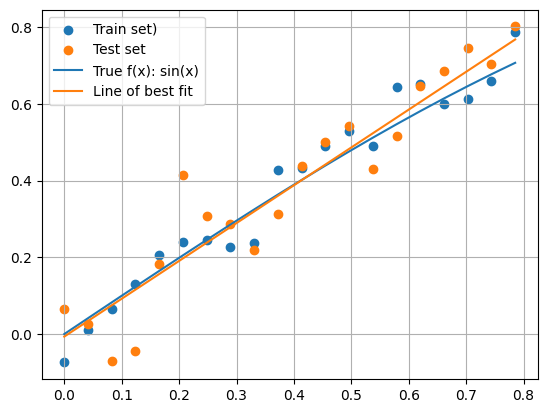

Coefficients:  (-0.0065658492997844875, 0.9861079632122304)
Train loss:    0.002781909577993999
Test loss:     0.007257526764790691


In [191]:
def compute_mse(y_true, y_pred, a, b):
    sos = (y_true-y_pred)**2
    mse = np.mean(sos)
    return mse

x_test = np.linspace(0, 0.25*np.pi, num=n_samples)
y_test = generate_sin(x_test, 0.1)

plt.scatter(x, y, label="Train set)")
plt.scatter(x_test, y_test, label="Test set")

# TODO: plot data, lines of best fit, true function, make it pretty
y_test_best = b*x_test+a

plt.plot(x_pure, y_pure, label="True f(x): sin(x)")
plt.plot(x_test, y_test_best, label="Line of best fit")

plt.grid()
plt.legend()
plt.show()

test_loss = compute_mse(x_test, y_test, a, b)
train_loss = compute_mse(x, y, a, b)

print("Coefficients: ", (a, b))
print("Train loss:   ", train_loss)
print("Test loss:    ", test_loss)

Which of the two losses *should* be better? Which is actually better? Why?

The two losses should be approximately equal because you want the model to work the same way for other data points as for the training set, but actually the train loss is smaller and thus better. This makes sense, as the error under a certain a and b is minimized for the training set and not specifically for the test set.

## Question 4 -- Ablation study of sampling

Try out different values of $n$ and $\epsilon$. How does each one affect the performance of your linear models? (report your steps and general observations both for the train and test sets).

If I increase n, both the train and the test loss decrease until some point, with the test loss beeing lower than the train loss sometimes. After that the extra data points and the extra differences to sum outweigh each other. When I decrease n, you can also see that the loss decreases until there are little points left because less points means less squared differences to sum.

If I increase epsilon, the train and test loss increases and when I decrease epsilon the train and test loss decreases. This is because a larger epsilon means that the data points deviate more from the true function.

## Question 5.1 -- More data

Generate a training and test set using the `generate_sin` function you defined, but in the range $x\in[0,2\pi]$, $n=20$ and $\epsilon=0.2$. Plot the train and test sets (scatter plots) and true function in one plot.

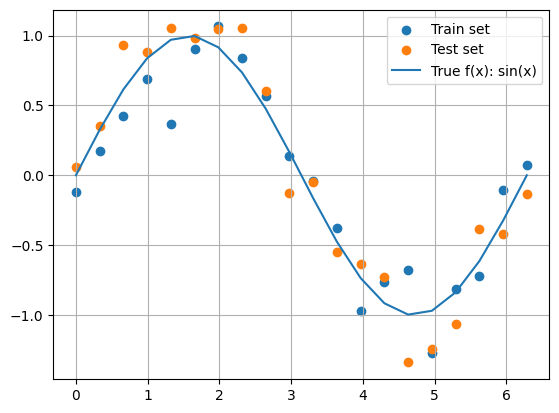

In [192]:
# TODO: generate new data and plot
n_samples = 20
x = np.linspace(0, 2*np.pi, num=n_samples)
y_train = generate_sin(x, 0.2)
y_test = generate_sin(x, 0.2)

x_pure = np.linspace(0, 2*np.pi, num=n_samples)
y_pure = np.sin(x_pure)

plt.scatter(x, y_train, label="Train set")
plt.scatter(x, y_test, label="Test set")

plt.plot(x_pure, y_pure, label="True f(x): sin(x)")
plt.grid()
plt.legend()
plt.show()

## Question 5.2 -- Polynomial fitting

Now, we examine the flexibility of the model we use and the performance on the training and test sets. 'Flexibility' is generally ill-defined, but intuitively, *a learning algorithm $A$ is more flexible than another learning algorithm $B$ if $A$ can fit its computed models $\hat{f}$ more closely to the training data than $B$ can do.* (quote from Jaeger, 2022, pg 11). For example, a quadratic function is more flexible (in theory) than a linear one, since a quadratic function can model data *at least* as well as linear ones. Specifically, the set of all linear functions is a subset of quadratic ones (by setting the quadratic coefficient to zero).

- Using the datapoints you made above with $x\in[0,2\pi]$, compute the best fitting polynomials from degrees $d\in\{1,...,20\}$.
- Save the corresponding train and test losses, and the resulting coefficients. Don't forget to change the function that computes the mean squared errors if required (perhaps `np.polyval` may help here?). Also, don't forget to create your model based _only_ on your train set.

In [193]:
coefficients = []
train_losses = []
test_losses = []

for degree in range(1, 21):
    coeffs = np.polyfit(x, y_train, degree)
    y_fit = np.polyval(coeffs, x)
    y_fit_test = np.polyval(coeffs, x_test)

    coefficients.append(coeffs)
    train_losses.append(compute_mse(y_train, y_fit, 0, 0))
    test_losses.append(compute_mse(y_test, y_fit_test, 0, 0))

<ipython-input-193-2cecd6d548b7>:6: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y_train, degree)
<ipython-input-193-2cecd6d548b7>:6: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y_train, degree)
<ipython-input-193-2cecd6d548b7>:6: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, y_train, degree)


**Bonus**: You may encounter this warning (if you don't, try increasing the range of polynomial degrees):

`RankWarning: Polyfit may be poorly conditioned`

What does this mean?

If the degree of the polynomial gets higher, the fit will become more adjusted to the exact datapoints of the training set because there is no other data to train on. The model thus does not get the training it needs to represents the underlying patterns well. When you want to apply this model to another situation it is not so useful.

## Question 5.3 -- Analysis
Plot the lines of best fit for $d=\{1,2,3,5,10,20\}$. These should look like the plots shown in Lecture 1 under section *Polynomial Regression*. You may also show this in multiple plots as long as you have the reference plots for each (the train and test data and the true underlying function).

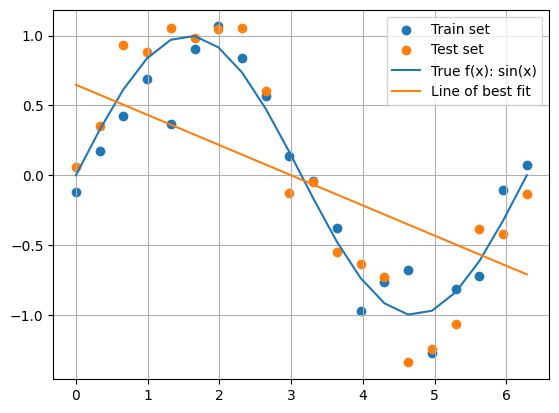

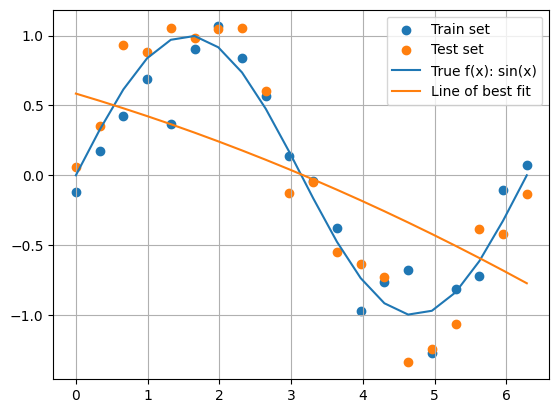

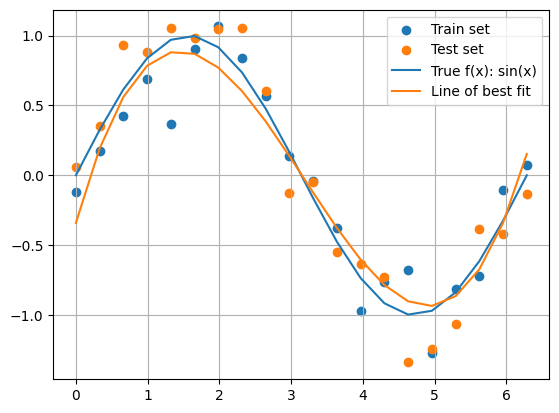

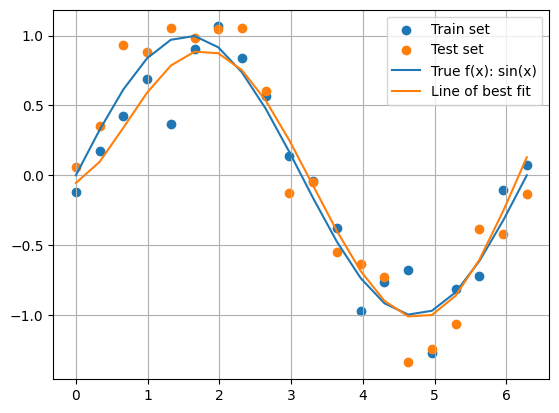

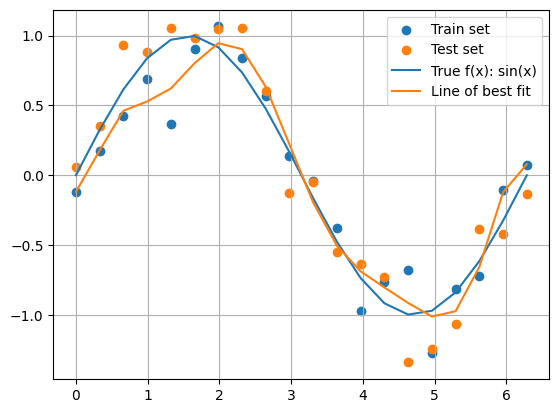

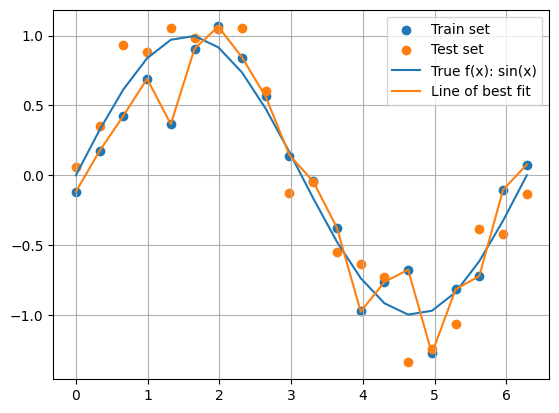

In [194]:
d = [1, 2, 3, 5, 10, 20]

for degree in d:
    y_fit = np.polyval(coefficients[degree-1], x)
    y_fit_test = np.polyval(coefficients[degree-1], x_test)
    plt.scatter(x, y_train, label="Train set")
    plt.scatter(x, y_test, label="Test set")

    plt.plot(x_pure, y_pure, label="True f(x): sin(x)")
    plt.plot(x, y_fit, label="Line of best fit")
    plt.grid()
    plt.legend()
    plt.show()


Now plot the MSE losses versus the flexibility (degree of the best fitting functions) for both the test and train sets. Again, a similar plot can be found in Lecture 1 under *Overfitting and Underfitting*.

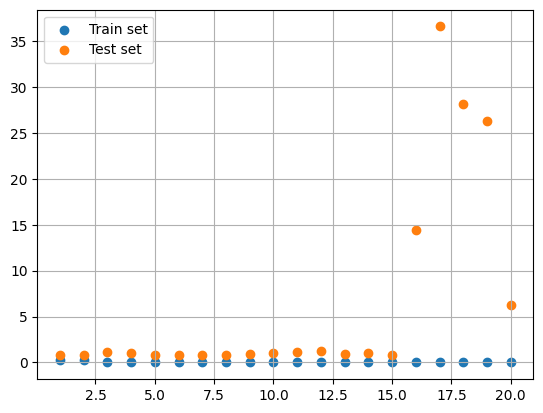

In [195]:
plt.scatter(range(1, 21), train_losses, label="Train set")
plt.scatter(range(1, 21), test_losses, label="Test set")
plt.grid()
plt.legend()
plt.show()

## Open Questions (Question 6)
1. Where do the polynomial models start to overfit? How can you tell?
2. What model fits the best to the training data? What model fits the best to the underlying function (visually, according to your intuition about the plots)? Are they the same?
4. Try increasing the number of training points to $n=200$. At what point does overfitting start now?
5. In general, does increasing the number of training points always allow for more flexible models of the real world? Why/why not?

1. from degree 16 onwards: then the error of the test set becomes very different from the error of the train set.
2. the model from degree 20 fits the training data the best, as it is closest to all the data points. The model from degree 5 looks the most like the underlying function. They are not the same as models of lower degrees take better into account that the data can contain some noise.
3. It is not that clear, since the error of both the train set and test set remains pretty consistent even after increasing the degree of the polynomial.
4. In general it does since most of the deviation from the trend is averaged out, but it could be that the less flexible model is just a better representation of reality.